In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Training DataFrame

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

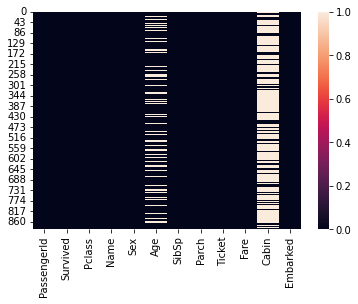

In [4]:
sns.heatmap(df_train.isna())

**Working with 'Age' column**

In [5]:
(df_train['Age'].isna().sum()/len(df_train['Age']))*100

19.865319865319865

In [6]:
age_corr = df_train.corr()['Age'].sort_values()
age_corr.drop('Age', inplace=True)
df_corr = pd.DataFrame(age_corr.values, columns=['Correlation'], index=age_corr.keys())
df_corr.sort_values('Correlation')

,Correlation
Pclass,-0.369226
SibSp,-0.308247
Parch,-0.189119
Survived,-0.077221
PassengerId,0.036847
Fare,0.096067


In [7]:
df_train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [8]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda row : row.fillna(row.median()))

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

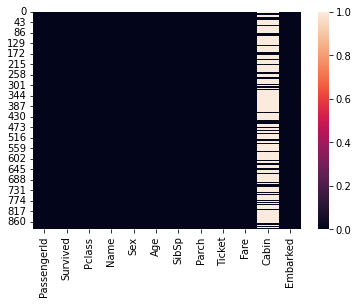

In [10]:
sns.heatmap(df_train.isna())

**Working with Cabin column**

In [11]:
(df_train['Cabin'].isna().sum()/len(df_train['Cabin']))*100

77.10437710437711

In [12]:
df_train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

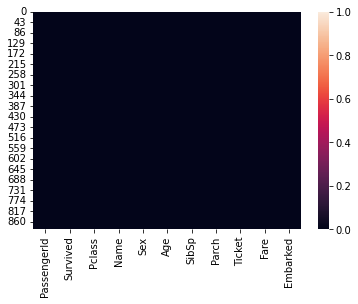

In [13]:
sns.heatmap(df_train.isna())

In [14]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Working with Embarked Column**

In [15]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df_train.fillna('S',axis=1,inplace=True)

In [17]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Preparing the Training Data

In [18]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Converting non-numerical columns to numerical**

In [20]:
gender = pd.get_dummies(df_train['Sex'],drop_first=True)

In [21]:
df_train['Gender'] = gender

In [22]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [23]:
# df_train.drop(['Pclass', 'Parch', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'AgeCateg'],axis=1,inplace=True)
df_train.drop(['Name', 'Sex', 'Ticket', 'Embarked'],axis=1,inplace=True)

df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,24.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


# Testing DataFrame

In [24]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

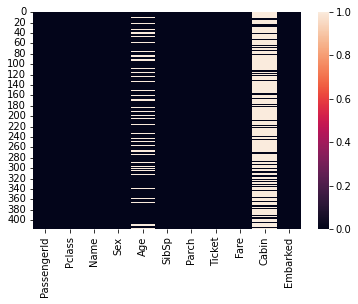

In [26]:
sns.heatmap(df_test.isna())

# Preparing the Testing Data

In [27]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Working with Age column**

In [29]:
(df_test['Age'].isna().sum()/len(df_test['Age']))*100

20.574162679425836

In [30]:
age_corr = df_test.corr()['Age'].sort_values()
age_corr.drop('Age', inplace=True)
df_corr = pd.DataFrame(age_corr.values, columns=['Correlation'], index= age_corr.keys())
df_corr.sort_values('Correlation')

,Correlation
Pclass,-0.492143
SibSp,-0.091587
Parch,-0.061249
PassengerId,-0.034102
Fare,0.337932


In [31]:
df_test.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [32]:
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda row: row.fillna(row.median()))

In [33]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

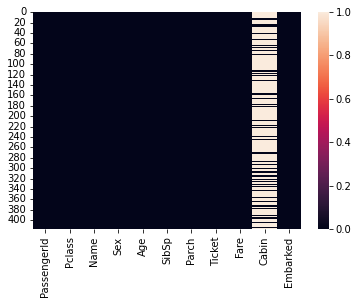

In [34]:
sns.heatmap(df_test.isna())

**Working with Cabin column**

In [35]:
(df_test['Cabin'].isna().sum()/len(df_test['Cabin']))*100

78.22966507177034

In [36]:
df_test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

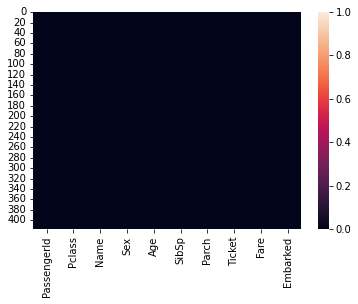

In [37]:
sns.heatmap(df_test.isna())

**Working with Fare column**

In [38]:
df_test['Fare'].median()

14.4542

In [39]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [40]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Converting non-numerical to numerical**

In [41]:
gender = pd.get_dummies(df_test['Sex'],drop_first=True)
df_test['Gender'] = gender

In [42]:
df_test.drop(['Name', 'Sex', 'Ticket', 'Embarked'],axis=1,inplace=True)

# Validating the DataFrames

In [43]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,24.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [44]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1
414,1306,1,39.0,0,0,108.9000,0
415,1307,3,38.5,0,0,7.2500,1
416,1308,3,24.0,0,0,8.0500,1


# Separating the Variables

In [45]:
# Training DataFrame
# x_train = df_train[[SibSp', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'adult', 'children', 'senior', 'teenager', 'young_adult', '1stClass', '2ndClass', '3rdClass']]
x_train=df_train.iloc[:,2:]

# y_train = df_train['Survived']
y_train=df_train.Survived


# Testing DataFrame
# x_test = df_test[[SibSp', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'adult', 'children', 'senior', 'teenager', 'young_adult', '1stClass', '2ndClass', '3rdClass']]
x_test=df_test.iloc[:,1:]

In [46]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,24.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [47]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1
414,1,39.0,0,0,108.9000,0
415,3,38.5,0,0,7.2500,1
416,3,24.0,0,0,8.0500,1


# Data Modeling

In [49]:
model = LogisticRegression()

In [50]:
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [52]:
model.score(x_test,y_predict)

1.0

# Consolidating the Results

In [53]:
submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
report=classification_report(submission["Survived"],y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.91      0.92      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



In [54]:
pd.DataFrame(confusion_matrix(submission["Survived"],y_predict),columns=['Predicted No', 'Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,252,14
Actual Yes,12,140


# Comparing Results

In [55]:
data = pd.DataFrame(y_predict, columns=['predict_survive'])

In [56]:
validation = pd.concat([submission["Survived"],data], axis=1)
validation

,Survived,predict_survive
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [57]:
def result_validation(row):
    if row['Survived'] == row['predict_survive']:
        return True
    else:
        return False

validation['comparison'] = validation.apply(result_validation, axis=1)

In [58]:
df_validation = validation.loc[validation['comparison'] == False]

In [59]:
index_list = df_validation.index.tolist()
index_list

[1,
 19,
 23,
 32,
 49,
 50,
 64,
 68,
 73,
 75,
 94,
 127,
 140,
 153,
 188,
 196,
 213,
 214,
 252,
 287,
 298,
 309,
 335,
 365,
 390,
 403]

In [60]:
df_comp_result = x_test.iloc[index_list]
df_comp_result = pd.concat([df_comp_result, df_validation], axis=1)
df_comp_result.sort_values(by=['SibSp', 'Parch', 'Gender'])

,Pclass,Age,SibSp,Parch,Fare,Gender,Survived,predict_survive,comparison
19,3,45.0,0,0,7.2250,0,1,0,False
68,1,31.0,0,0,28.5375,1,0,1,False
73,1,28.5,0,0,27.7208,1,0,1,False
75,1,32.5,0,0,211.5000,1,0,1,False
94,1,25.0,0,0,26.0000,1,0,1,False
298,1,30.0,0,0,45.5000,1,0,1,False
335,1,30.0,0,0,26.0000,1,0,1,False
390,1,23.0,0,0,93.5000,1,0,1,False
403,1,17.0,0,0,47.1000,1,0,1,False
23,1,21.0,0,1,61.3792,1,0,1,False


<AxesSubplot:xlabel='SibSp', ylabel='count'>

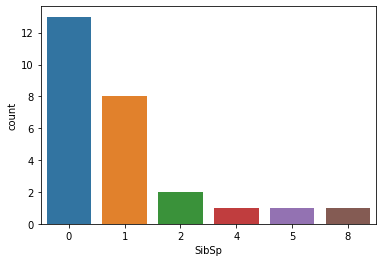

In [61]:
sns.countplot(x='SibSp', data=df_comp_result)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

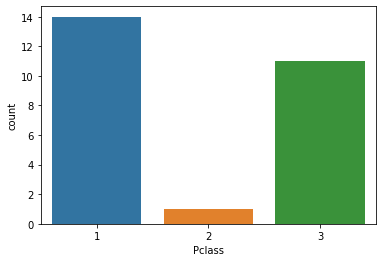

In [62]:
sns.countplot(x='Pclass', data=df_comp_result)

<AxesSubplot:xlabel='Parch', ylabel='count'>

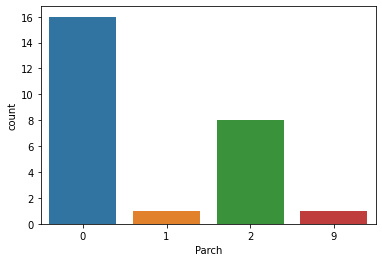

In [63]:
sns.countplot(x='Parch', data=df_comp_result)

# Creating an Output File

In [64]:
data = pd.DataFrame(y_predict, columns=['survived'])

In [65]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1
414,1,39.0,0,0,108.9000,0
415,3,38.5,0,0,7.2500,1
416,3,24.0,0,0,8.0500,1


In [66]:
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [67]:
data2 = df_test.PassengerId

In [68]:
result = pd.concat([data2, data],axis=1)
result

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
result.to_csv('kaggle_titanic_2.csv',index=False)